In [ ]:
#import Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df =  pd.read_csv("spam_ham_dataset.csv")

In [ ]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.shape

(5171, 4)

In [ ]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [ ]:
df.label_num.values

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
df=df.drop(['text'],axis=1)

In [ ]:
df.head()

,Unnamed: 0,label,label_num
0,605,ham,0
1,2349,ham,0
2,3624,ham,0
3,4685,spam,1
4,2030,ham,0


In [ ]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [ ]:
df['label'].replace(["ham","spam"],
                        [0, 1], inplace=True)

In [ ]:
df.head()

,Unnamed: 0,label,label_num
0,605,0,0
1,2349,0,0
2,3624,0,0
3,4685,1,1
4,2030,0,0


In [ ]:
df.describe()

,Unnamed: 0,label,label_num
count,5171.000000,5171.000000,5171.000000
mean,2585.000000,0.289886,0.289886
std,1492.883452,0.453753,0.453753
min,0.000000,0.000000,0.000000
25%,1292.500000,0.000000,0.000000
50%,2585.000000,0.000000,0.000000
75%,3877.500000,1.000000,1.000000
max,5170.000000,1.000000,1.000000


In [ ]:
import numpy as np
from scipy import stats
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

,Unnamed: 0,label,label_num
0,605,0,0
1,2349,0,0
2,3624,0,0
3,4685,1,1
4,2030,0,0
...,...,...,...
5166,1518,0,0
5167,404,0,0
5168,2933,0,0
5169,1409,0,0


In [ ]:
import pandas as pd

def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


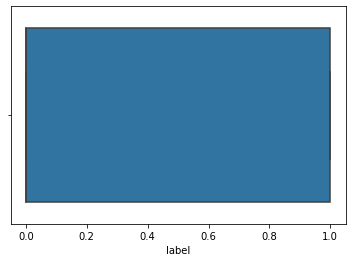

In [ ]:
import seaborn as sns
sns.boxplot(df['label'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


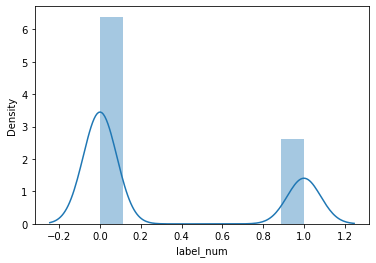

In [ ]:
import seaborn as sns
sns.distplot(df['label_num'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


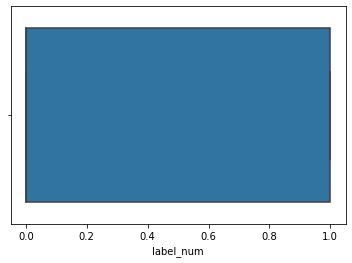

In [ ]:
import seaborn as sns
sns.boxplot(df['label_num'])

In [ ]:
X= df.iloc [:, 1: 4].values
Y= df.iloc [:, -1 :5].values.reshape(5171,)

In [ ]:
X

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [1, 1]])

In [ ]:
Y

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 2 ,random_state=0)
clf_en.fit(X_train, Y_train)
y_pred_en = clf_en.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(Y_test,y_pred_en))
print(classification_report(Y_test,y_pred_en))
print(accuracy_score(Y_test,y_pred_en))

[[1128    0]
 [   0  424]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1128
           1       1.00      1.00      1.00       424

    accuracy                           1.00      1552
   macro avg       1.00      1.00      1.00      1552
weighted avg       1.00      1.00      1.00      1552

1.0


In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred_en))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred_en))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_en)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


[Text(0.5, 0.75, 'X[1] <= 0.444\nentropy = 0.878\nsamples = 3619\nvalue = [2544, 1075]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 2544\nvalue = [2544, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 1075\nvalue = [0, 1075]')]

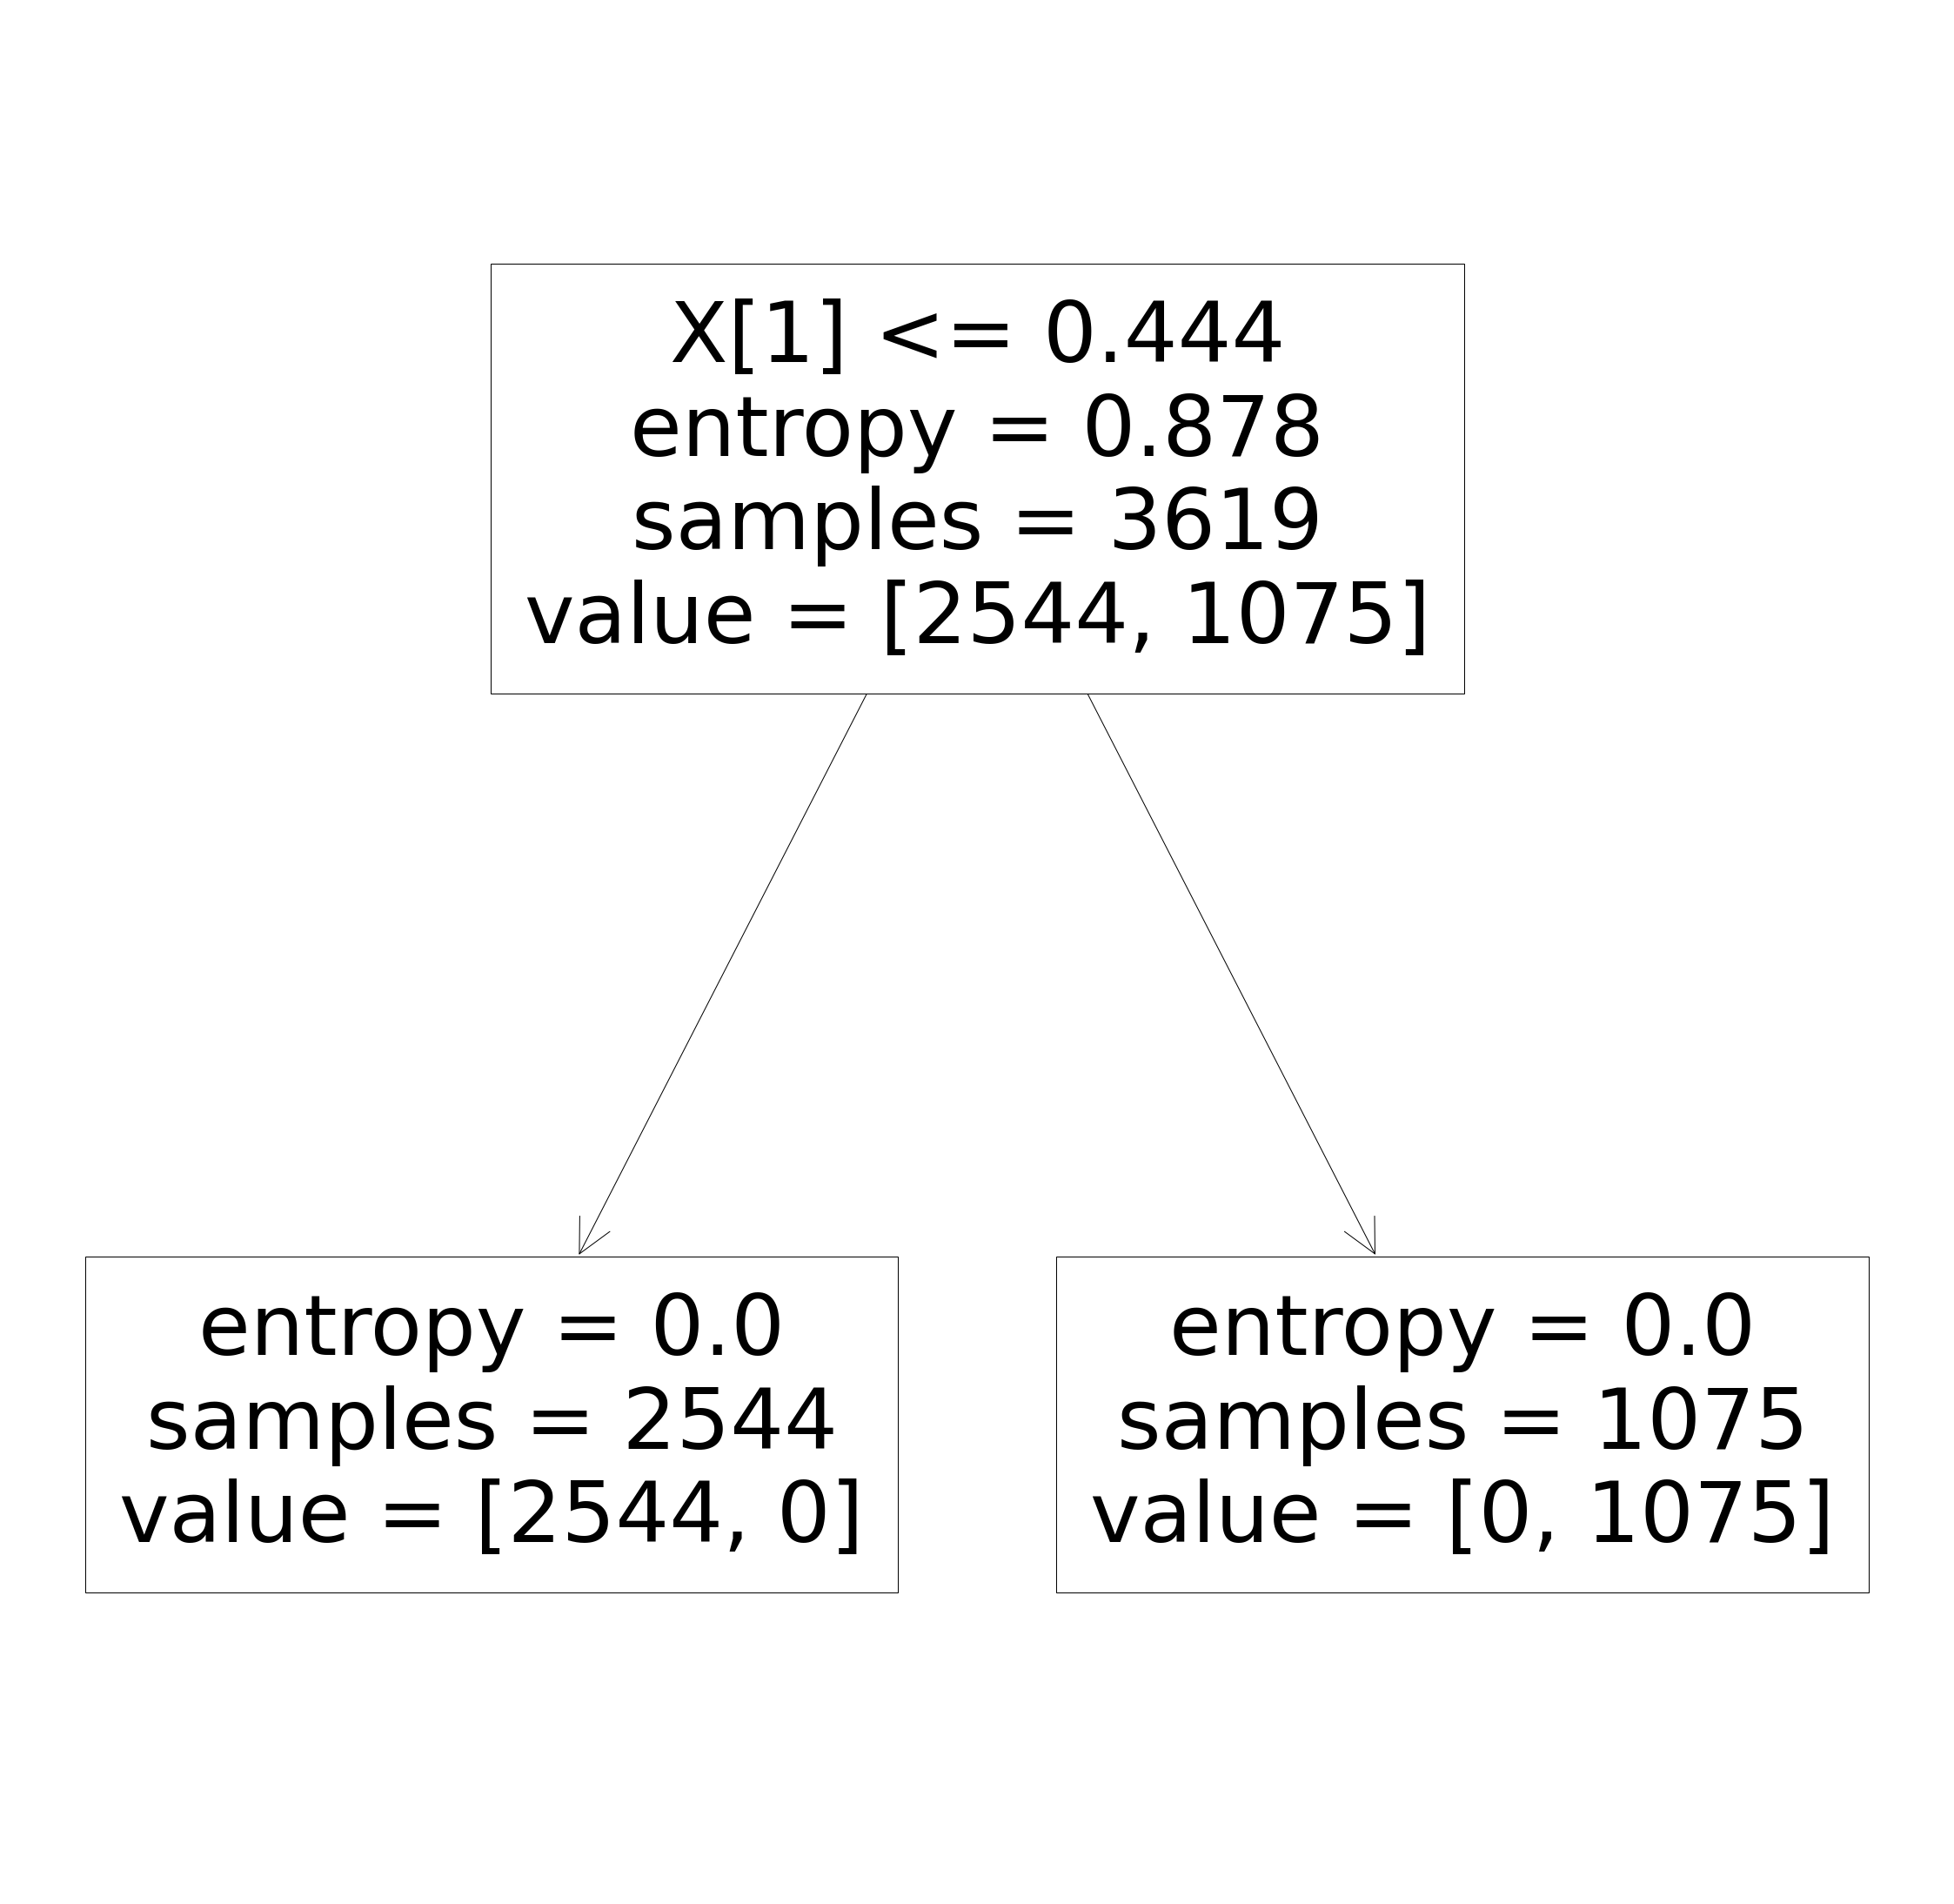

In [ ]:
plt.figure(figsize=(40,40))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, Y_train))